# scipy-stats

## Overview

The SciPy Python library is a large collection of scientific computing algorithms and functions presented in a number of subpackages in the domain of, among others, integration, interpolation, optimisation, linear algebra, image and signal processing, and statistics [1]. The library is based on numpy [2]. The SciPy-stats package [3] 

In [93]:
# imports
from scipy import stats as ss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime



In [90]:

data_dir = 'data/penguins'
penguins_raw = os.path.join(data_dir, 'penguins_raw.csv')


# Download penguin data if the raw data does not
# already exist in the data directory
if not os.path.exists(penguins_raw):

    # Penguin data locations
    urls = {
        'adelie': 'https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.219.5&entityid=002f3893385f710df69eeebe893144ff',
        'gentoo': 'https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.5&entityid=e03b43c924f226486f2f0ab6709d2381',
        'chinstrap': 'https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.221.6&entityid=fe853aa8f7a59aa84cdd3197619ef462'
    }
    # Download csv files and concatenate to one dataframe
    penguins = pd.concat([pd.read_csv(url) for url in urls.values()])
    # Write dataframe to disk as csv
    csv = penguins.to_csv(index=False)

    with open(penguins_raw, 'w') as f:
        f.write(csv)

    # Backup location
    timestamp = datetime.now().strftime("_%Y%m%d_%H%M%S")
    backup_fname = 'penguins_raw' + timestamp + '.csv'
    backup = os.path.join(data_dir, 'backup', backup_fname)
    with open(backup, 'w') as f:
        f.write(csv)
    

In [91]:
penguins_min = os.path.join(data_dir, 'penguins_min.csv')

def subset_penguins():
    # Read the raw penguin data to a DataFrame
    df = pd.read_csv(penguins_raw)
    # Drop most of the columns
    df = df[['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']]
    # Drop rows with missing data
    df.dropna(inplace=True)
    # Make column names easier to type
    df.columns = df.columns.str.replace(' \(.+\)', '', regex=True)
    # Make Species names more concise
    df['Species'] = df['Species'].str.replace('\s+.+$', '', regex=True)
    # Write csv to disk
    df.to_csv(penguins_min, index=False)

    return df

if os.path.exists(penguins_min):
    penguins = pd.read_csv(penguins_min)
else:
    penguins = subset_penguins()


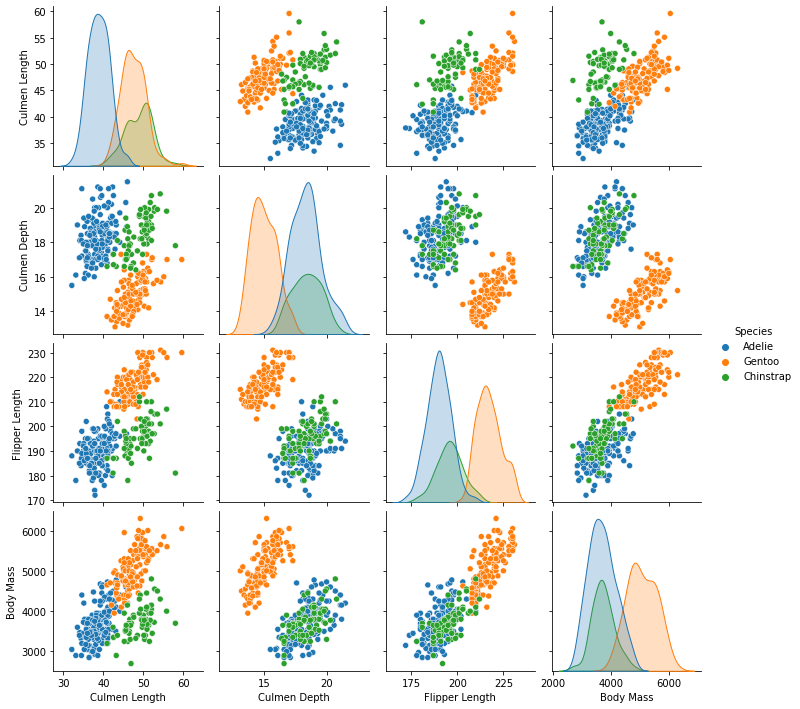

In [96]:
sns.pairplot(penguins, hue='Species');

## ANOVA

Assumptions
1. Dependent variable must be continuous
1. Independent variable must consist of 2 or more independent categorical groups
1. Observations should be independent
1. No significant outliers
1. Dependent variable approx. normally distributed for each independent category
1. homogeneity of variances


### Using ANOVA with scipy-stats

outliers---boxplot

check for normality of EACH independent category 
                    --- kde (distplot?)
                    --- shapiro-wilkes
                    
homogeneity of variances --- levene's test for homogeneity of variance
                         --- scipy.stats.levene

ANOVA: scipy.stats.f_oneway   ----- also check statsmodels

Perform post-hoc tests --- see notebook

## References